<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week6_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lesson 2

In [1]:
from tensorflow.keras import layers, models

model = models.Sequential([ # model consists of a linear stack of layers, where each layer's output is fed into the next.
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(10, activation='softmax')
])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7524 - loss: 0.7703 - val_accuracy: 0.9512 - val_loss: 0.1630
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9159 - loss: 0.2950 - val_accuracy: 0.9595 - val_loss: 0.1318
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9319 - loss: 0.2348 - val_accuracy: 0.9649 - val_loss: 0.1169
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9412 - loss: 0.1990 - val_accuracy: 0.9659 - val_loss: 0.1169
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9445 - loss: 0.1861 - val_accuracy: 0.9708 - val_loss: 0.1035
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9476 - loss: 0.1721 - val_accuracy: 0.9720 - val_loss: 0.0970
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9507 - loss: 0.1693 - val_accuracy: 0.9713 - val_loss: 0.1001
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9513 - loss: 0.16

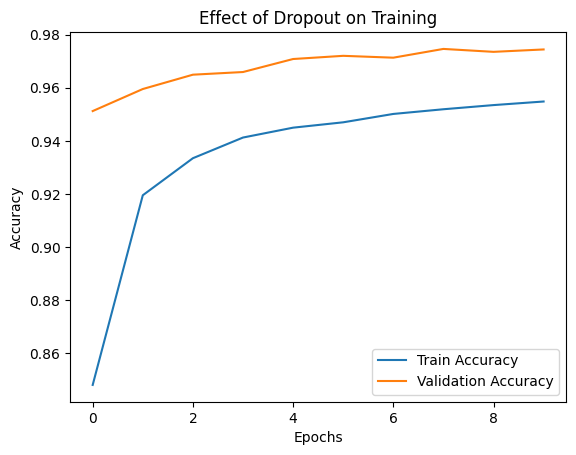

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10) # [1, 0, 0, .. 0] ]
y_test = to_categorical(y_test, 10)

# Define the model with Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    layers.Dropout(0.3),  # Dropout with 30% probability
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout on Training')
plt.legend()
plt.show()

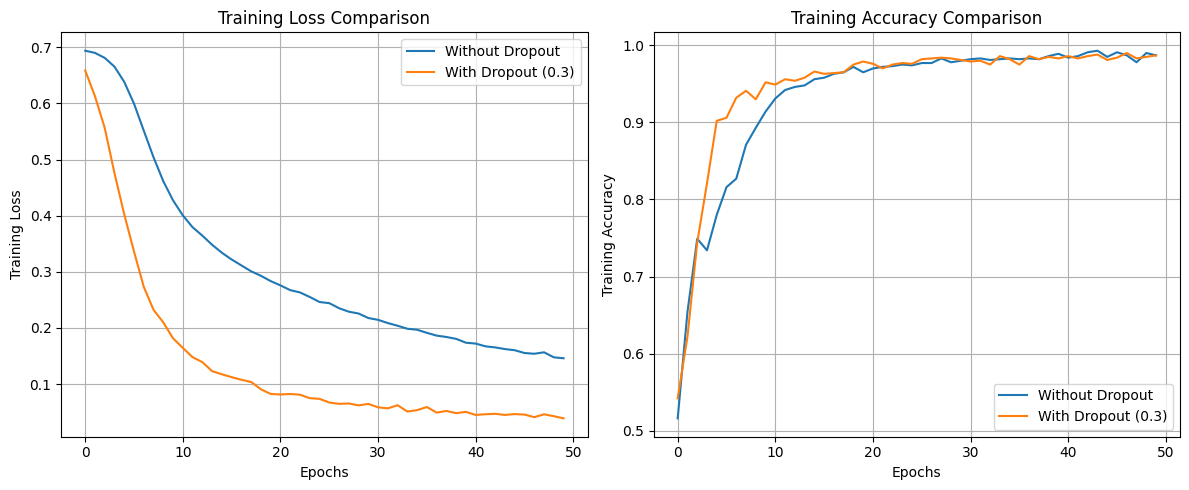

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)

# Model with Dropout
def create_model_with_dropout():
    model = keras.Sequential([
        keras.Input(shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),  # Dropout added here
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model without Dropout
def create_model_without_dropout():
    model = keras.Sequential([
        keras.Input(shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train both models
model_dropout = create_model_with_dropout()
model_nodropout = create_model_without_dropout()

history_dropout = model_dropout.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
history_nodropout = model_nodropout.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Plot comparison: Training Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_nodropout.history['loss'], label='Without Dropout')
plt.plot(history_dropout.history['loss'], label='With Dropout (0.3)')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

# Plot comparison: Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_nodropout.history['accuracy'], label='Without Dropout')
plt.plot(history_dropout.history['accuracy'], label='With Dropout (0.3)')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


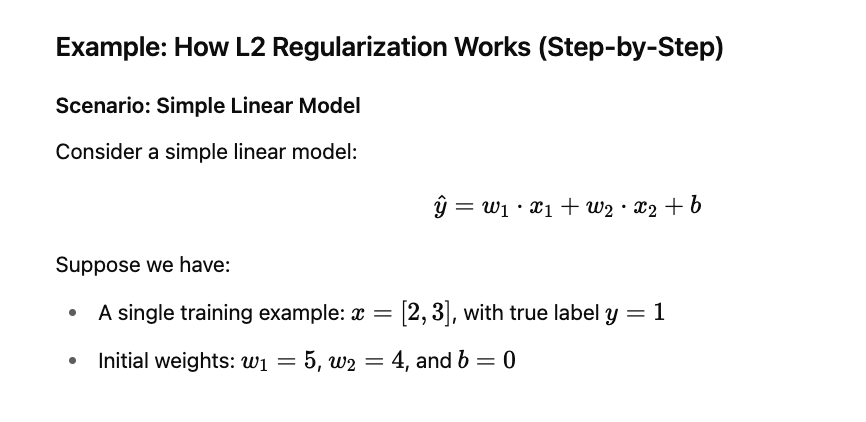

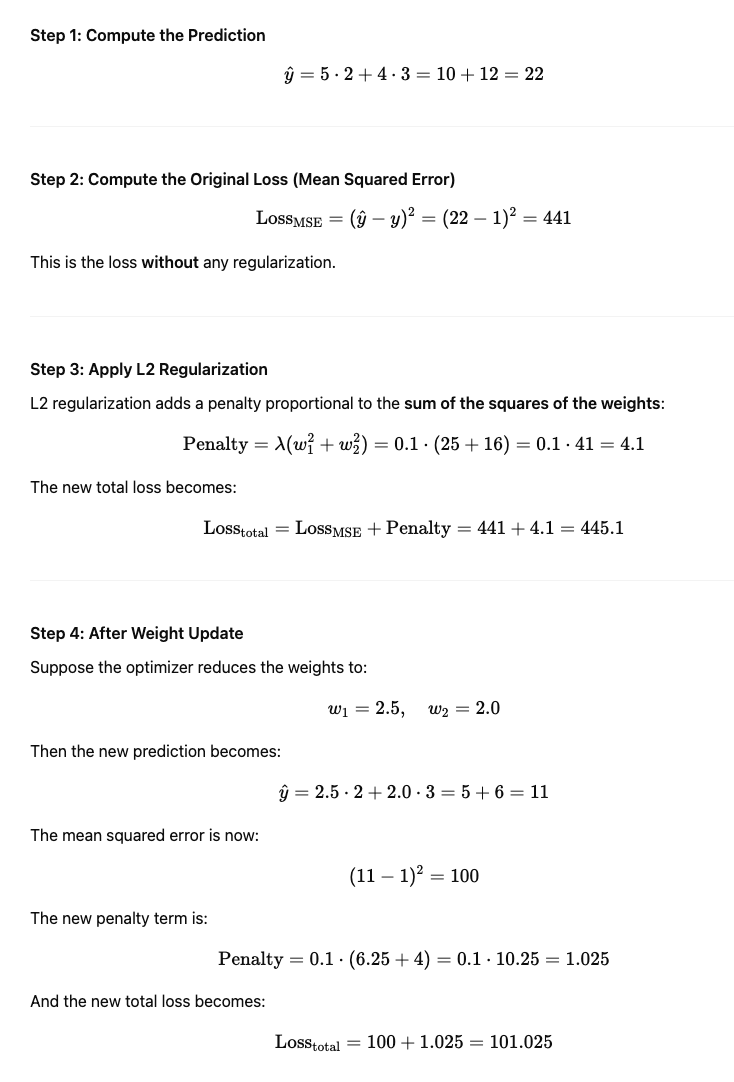

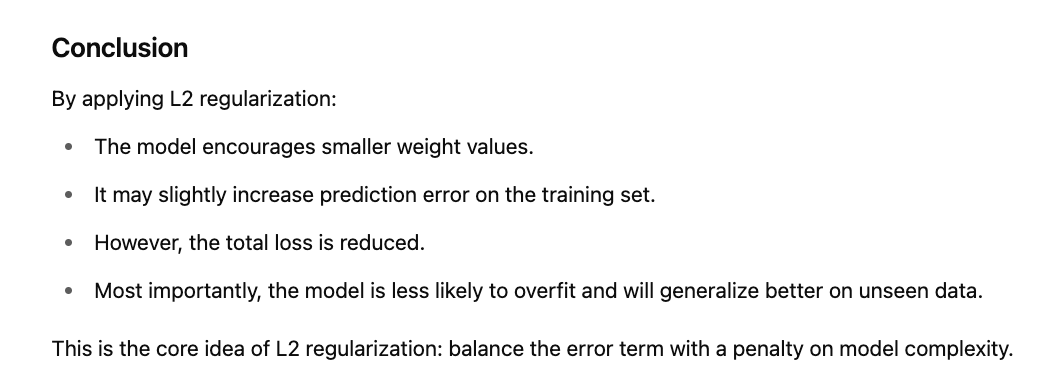

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


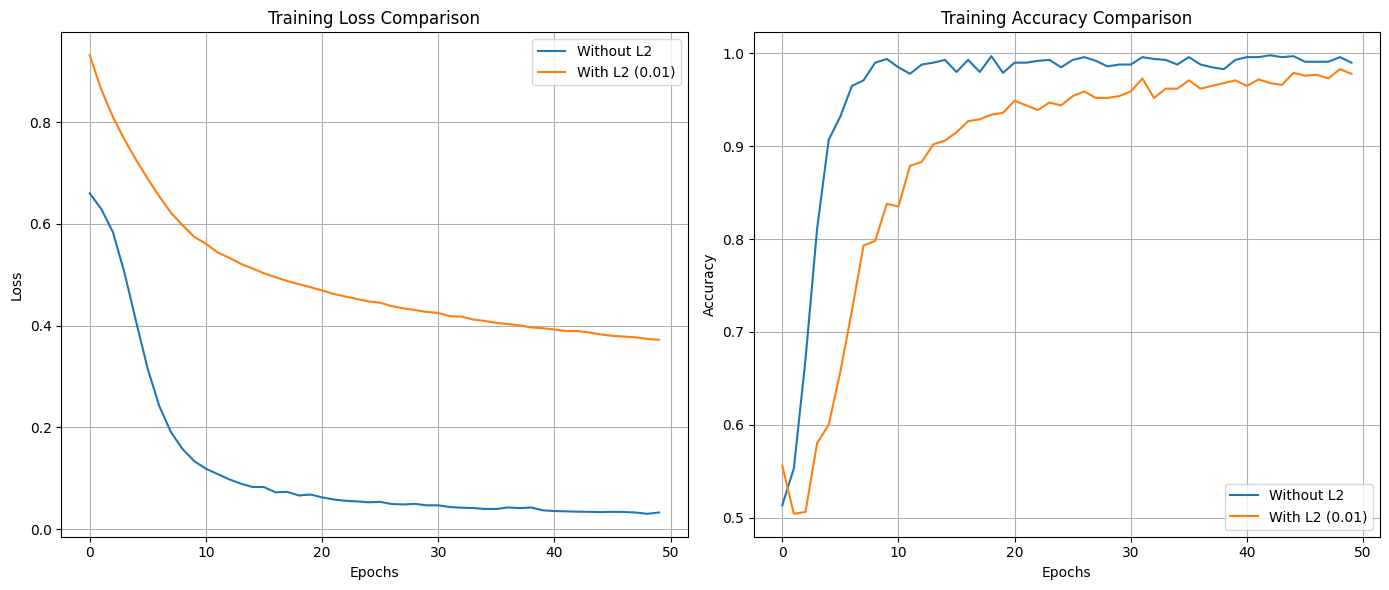

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)

# 2) Define model without L2 regularization
def create_model_without_l2():
    model = models.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3) Define model with L2 regularization
def create_model_with_l2():
    model = models.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4) Train both models
model_no_l2 = create_model_without_l2()
model_with_l2 = create_model_with_l2()

history_no_l2 = model_no_l2.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
history_with_l2 = model_with_l2.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# 5) Plot training loss and accuracy comparison
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_no_l2.history['loss'], label='Without L2')
plt.plot(history_with_l2.history['loss'], label='With L2 (0.01)')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_l2.history['accuracy'], label='Without L2')
plt.plot(history_with_l2.history['accuracy'], label='With L2 (0.01)')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
